In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sranodec as anom
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import statistics
import pandas as pd
from scipy.stats import entropy
from math import log, e

#from kats.tsfeatures.tsfeatures import TsFeatures as tsf
from scipy.signal import periodogram,welch
from tqdm import tqdm
#from neuralprophet import NeuralProphet, set_log_level
#set_log_level("ERROR")
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
#import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from scipy.stats import entropy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib
import random
import matplotlib.transforms as mtransforms
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

from numpy.fft import rfft, irfft, rfftfreq
from scipy import pi, signal, fftpack
#sns.set(style="darkgrid")
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

In [29]:
 #pip install sranodec matplotlib scipy sns statsmodels pickle

In [2]:
#data_location = "C:\Users\User\Desktop\Udemy Course\Anomaly detection TS"
#df = pd.read_csv(data_location + "export_ED250_GE10 81122 - 4 wochen_v2.csv")

#df = pd.read_csv(data_location + "GE10_30-31-01-23-DK IoT Sensor (Export) v5.csv")
#df = pd.read_csv(data_location + "export_ED250_GE10 81122 - 4 wochen_with_anomalies.csv")
#X, y = df.iloc[:, 3:-5], df.iloc[:, -4]
#X, y = df.iloc[:, 3:-5], df.iloc[:, 5:-3]
#df = pd.read_csv('C:/Users/hotaha/OneDrive - dormakaba Group/Desktop/Python/LOF dbscan anomaly detection clustering/data_export_ED_020823_gegenwind.csv')
#df = pd.read_csv('C:/Users/hotaha/OneDrive - dormakaba Group/Desktop/Python/LOF dbscan anomaly detection clustering/data_export_ED_020823_keine volle oeffnung.csv')
df = pd.read_csv('C:/Users/User/Desktop/Udemy Course/Anomaly detection TS/data_sensor.csv')

####normal
#df = pd.read_csv('C:/Users/hotaha/OneDrive - dormakaba Group/Desktop/Python/LOF dbscan anomaly detection clustering/data_export_ED_020823_normal.csv')


#X=X[0:10080]
#y=y[0:10080]
#df_new=df.iloc[:, 3:-3]
#df_new=df_new[:10080]
#df=df[:10080]
#df=df[df['Fehlersimulation']!='Widerstand_Last'] #& df['Fehlersimulation']!= 'Keine volle Oeffnung']
#df=df[df['Fehlersimulation']!='Keine volle Oeffnung']


X, y = df.iloc[:, 1:-3], df.iloc[:, 3:]

df

Unnamed: 0  VARIABLE  CALCULATION  TIMESTAMP_S   TIMESTAMP_MS  VALUE  \
0                0     12695            0   1665555300              0  0.000   
1                1     12695            0   1665570600              0  0.000   
2                2     12695            0   1665584100              0  0.000   
3                3     12695            0   1665599400              0  0.000   
4                4     12695            0   1665612900              0  0.000   
...            ...       ...          ...          ...            ...    ...   
845258      845258     12695            0   1667898296  1667898296335  1.900   
845259      845259     12695            0   1667898296  1667898296580  1.716   
845260      845260     12695            0   1667898296  1667898296351  1.821   
845261      845261     12695            0   1667898302  1667898302039  1.214   
845262      845262     12695            0   1667898302  1667898302055  1.214   

        STATUS GUID  STRVALUE  
0       262144  NaN       1.0  
1       262144  NaN       1.0  
2            0  NaN       1.0  
3            0  NaN       1.0  
4            0  NaN       2.0  
...        ...  ...       ...  
845258       0            0.0  
845259       0            0.0  
845260       0            0.0  
845261       0            0.0  
845262       0            0.0  

[845263 rows x 9 columns]

In [4]:
y

Value_Float
0          296.70
1          305.39
2           69.94
3            0.33
4          296.97
...           ...
7877       305.32
7878        70.01
7879        -0.78
7880       296.54
7881       305.51

[7882 rows x 1 columns]

In [31]:
df['Value']=-df['Value']
dfcur=df[df['Topic']=='currentSenChar/mqtt']
df=dfcur

In [33]:
df=df.reset_index()

In [34]:
int(len(df['Value'])/1)

7882

In [35]:
##rms

df['Value_RMS']=np.sqrt(np.mean(np.square(df['Value'])))
std=np.std(((df['Value'])))
window_size=100
MAV=np.convolve(df['Value'], np.ones(window_size)/window_size, mode='valid')

In [36]:
import numpy as np

def calculate_rolling_rms(values, window_size):
    # Square the values
    squared_values = np.square(values)
    # Calculate the rolling sum of squared values
    rolling_sum = np.convolve(squared_values, np.ones(window_size), 'valid')
    # Calculate the mean
    rolling_mean = rolling_sum / window_size
    # Take the square root to get RMS
    rolling_rms = np.sqrt(rolling_mean)
    return rolling_rms

# Example usage:
#values = np.random.rand(100)  # example data
window_size = 100
rms_values = calculate_rolling_rms(df['Value'], window_size)

print(rms_values)


[215.756874   215.75577402 215.76101427 ... 215.74075298 215.73249736
 215.73150594]


In [37]:
std

136.08743114897254

In [38]:
MAV

array([167.9011, 167.9003, 167.904 , ..., 167.8208, 167.8148, 167.8141])

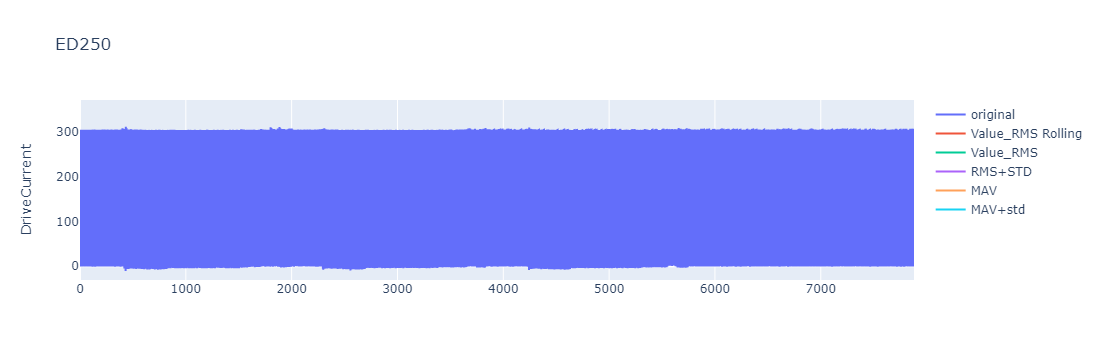

In [39]:
fig = go.Figure()

fig.add_scatter( x=df['Datetime'].index, y=df['Value'], mode='lines', name="original")
fig.add_scatter( x=df['Datetime'], y=rms_values, mode='lines', name="Value_RMS Rolling")
fig.add_scatter( x=df['Datetime'], y=df['Value_RMS'], mode='lines', name="Value_RMS")
#fig.add_scatter( x=df['Datetime'], y=std, mode='lines', name="Value_std")
#fig.add_scatter( x=df['TIMESTAMP_S'].index, y=y_outlier, mode='lines', name="outlier")
fig.add_scatter( x=df['Datetime'], y=rms_values+std, mode='lines', name="RMS+STD")
fig.add_scatter( x=df['Datetime'], y=MAV, mode='lines', name="MAV")
fig.add_scatter( x=df['Datetime'], y=MAV+std, mode='lines', name="MAV+std")

fig.update_layout(
    
    yaxis_title='DriveCurrent',
    title='ED250',
    hovermode="x")
#fig.add_hline(y=957)
fig.show()

In [13]:
#(df['VALUE'])
type(df)

pandas.core.frame.DataFrame

# plot residual and decompose

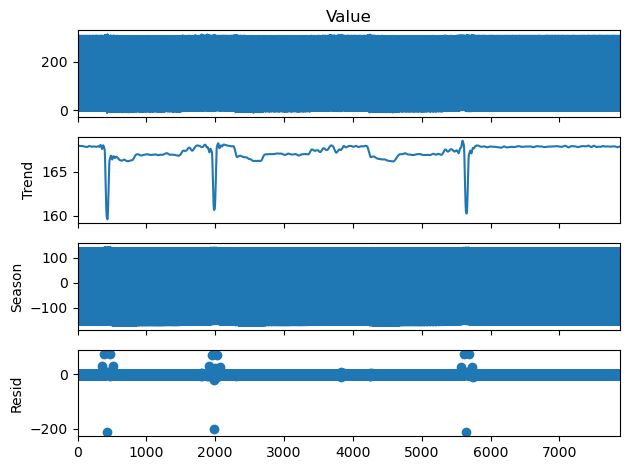

In [42]:
#https://medium.com/@richa.mishr01/anomaly-detection-in-seasonal-time-series-where-anomalies-coincide-with-seasonal-peaks-9859a6a6b8ba

stl = STL(df['Value'],period=40)
res = stl.fit()
fig = res.plot()

In [43]:
#res.resid

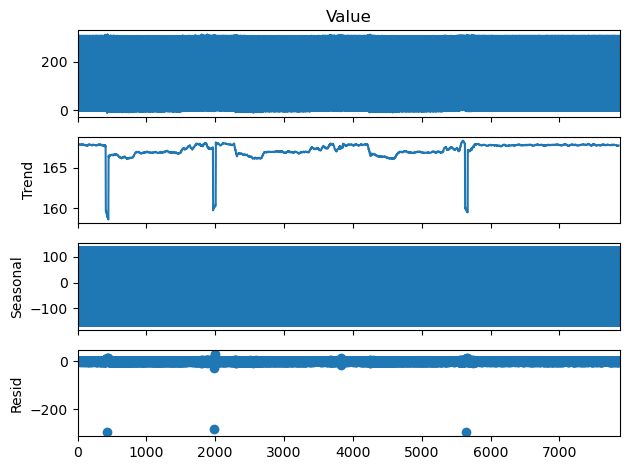

In [69]:
#seasonal_decomp = seasonal_decompose(y['VALUE'], model="additive")
#seasonal_decomp.plot();

result = seasonal_decompose((df['Value']), model='addaptive',period=40)#, freq=60)  #freq=7
result.plot()
pyplot.show()

In [45]:
sum(result.resid)
#res.resid

nan

In [46]:
null_counts = df.isna().sum()
if null_counts.sum() > 0:
    print("There are null values in the DataFrame.")
    print("Null value counts:\n", null_counts)
else:
    print("No null values found in the DataFrame.")



No null values found in the DataFrame.


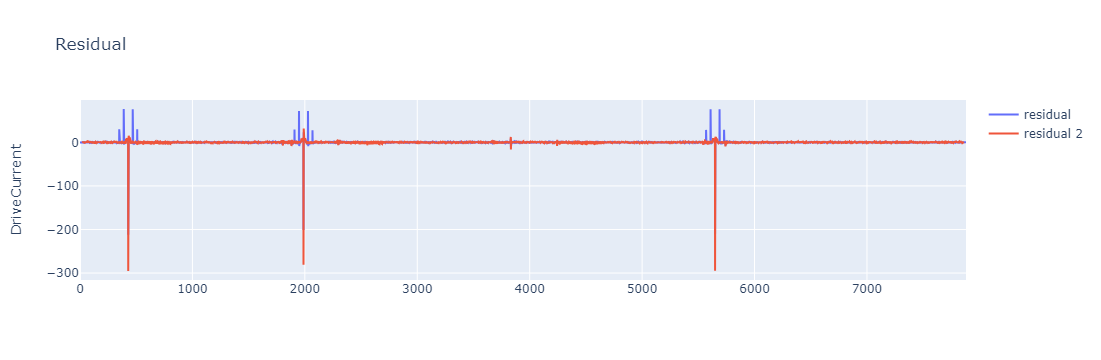

In [70]:
fig = go.Figure()

fig.add_scatter( x=df['Datetime'].index, y=res.resid, mode='lines', name="residual")
fig.add_scatter( x=df['Datetime'].index, y=result.resid, mode='lines', name="residual 2")
#fig.add_scatter( x=df['TIMESTAMP_S'].index, y=res.seasonal, mode='lines', name="seasonal")
#fig.add_scatter( x=df['TIMESTAMP_S'].index, y=y_outlier, mode='lines', name="outlier")
#fig.add_scatter( x=df['TIMESTAMP_S'].index, y=df['VALUE'], mode='lines', name="original")
fig.update_layout(
    
    yaxis_title='DriveCurrent',
    title='Residual',
    hovermode="x")
#fig.add_hline(y=957)
fig.show()

In [48]:
# calc outlier

In [49]:
#mu, sigma = y['VALUE'].mean(axis=0), y['VALUE'].std(axis=0)

#y_outlier = (y_outlier - mu) / sigma
#y_outlier

## FFT

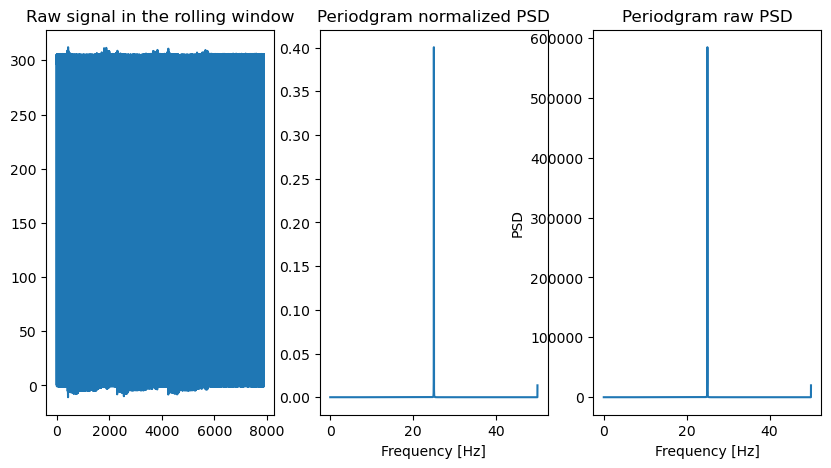

In [50]:
val = df['Value']
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title('Raw signal in the rolling window')
plt.plot(val)
f, psd = periodogram(val,100, scaling='density')
psd_norm = psd / np.sum(psd)
plt.subplot(1,3,2)
plt.plot(f,psd_norm, label='normalized PSD')
plt.xlabel('Frequency [Hz]')
plt.title('Periodgram normalized PSD')
plt.subplot(1,3,3)
plt.plot(f,psd, label='raw PSD')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD')
plt.title('Periodgram raw PSD')
#plt.legend()
plt.show()

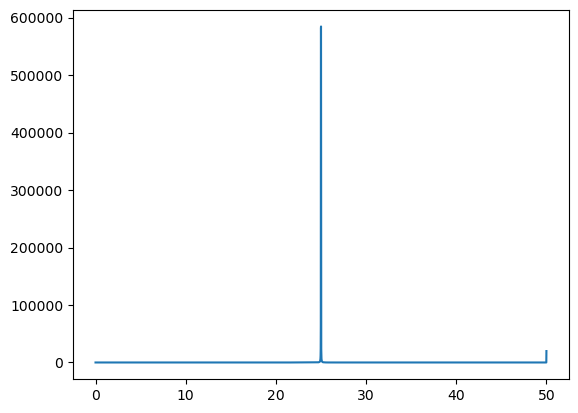

In [51]:
plt.plot(f,psd, label='raw PSD')

# Spec Resid calc scoring and changes points

In [52]:


# less than period
amp_window_size=int(len(X)/2)-1
# (maybe) as same as period
series_window_size=int(len(X)/2)-1
# a number enough larger than period
score_window_size=int(len(X)/2)-1

spec = anom.Silency(amp_window_size, series_window_size, score_window_size)
spec

In [53]:
y.values

array([[296.7 ],
       [305.39],
       [ 69.94],
       ...,
       [ -0.78],
       [296.54],
       [305.51]])

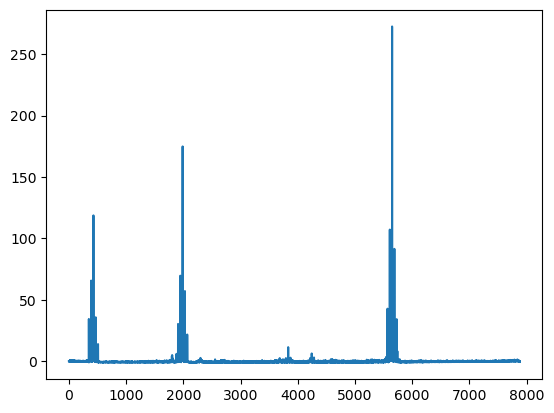

In [54]:

score = spec.generate_anomaly_score(res.resid.values)
#score = spec.generate_anomaly_score(y.values)
plt.plot(score)

df['score']=score

In [55]:
#counts, bins = np.histogram(y)

#plt.stairs(counts, bins)

In [56]:
#plt.hist(y,bins=100)

In [57]:
#y['VALUE'][1]

# calculate anoaml : 3* std. deviatoin or 99 percentile

In [58]:
#np.percentile(score, 99)

In [71]:

#standard_deviation = statistics.stdev(res.resid.values)*1.3
standard_deviation = statistics.stdev((df['Value']))
standard_deviation

136.0960647687206

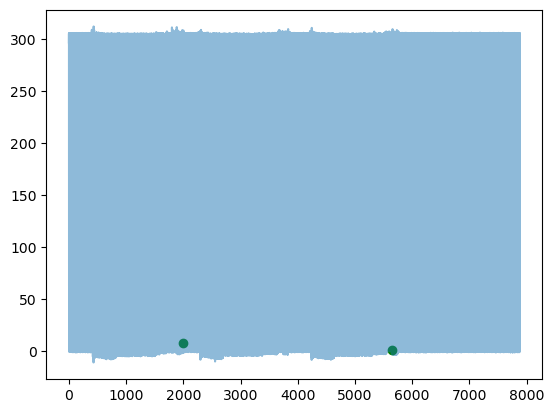

In [60]:


# Plot data with estimated anomalous points
plt.plot(y.values, alpha=0.5, label="observation")
#plt.plot(score, alpha=0.5, label="observation 2")
#index_changes = np.where(score > np.percentile(score, 99))[0]
index_changes = np.where(score >= standard_deviation)[0]
plt.scatter(index_changes, y.values[index_changes], c='green', label="change point")



In [61]:
#df=df.reset_index()

In [62]:
df['anomaly']=np.nan

for i in range(len(df)):
    if df['score'][i]>= standard_deviation:
        df['anomaly'][i]=df['Value'][i]
    else:
        df['anomaly'][i]=np.nan

In [63]:
#df

In [64]:
#index_changes

In [65]:
#y.values[index_changes]

In [66]:
#y['VALUE'][index_changes]

## Plotting anomalies

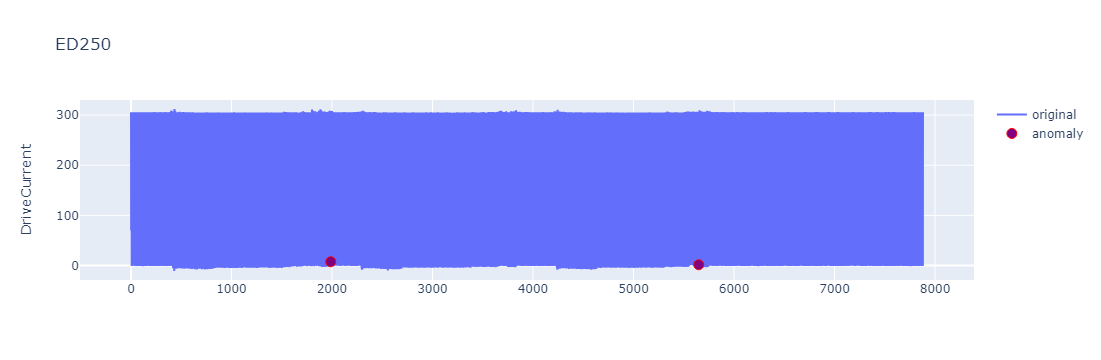

In [67]:
fig = go.Figure()

#fig.add_scatter( x=df['TIMESTAMP_S'], y=y, mode='lines', name="original")


fig.add_scatter( x=df['Datetime'].index, y=df['Value'], mode='lines', name="original")
#fig.add_scatter( x=X['TIMESTAMP_S'].index, y=score, mode='lines', name="score")
#fig.add_scatter( x=X.index, y=y, mode='lines', name="original")
#fig.add_scatter( x=index_changes, y=y['VALUE'][index_changes], mode='markers', name="anomaly",
fig.add_scatter( x=df['Datetime'].index, y=df['anomaly'], mode='markers', name="anomaly",
                marker=dict(
            color='purple',
            size=10,
            line=dict(
                color='Red',
                width=1
            )))

fig.update_layout(
    
    yaxis_title='DriveCurrent',
    title='ED250',
    hovermode="x")
#fig.add_hline(y=957)
fig.show()

In [68]:
#X['TIMESTAMP_S']

In [46]:
#X['index_changes']=index_changes